<h1>International Sales Analysis</h1>

<h2>Objective</h2>
<p>The main purpose of this project is to answer the following questions using pandas library</p>
<p>Q1. What is the overall sales trend?<br>
Q2. Which are the Top 10 products by sales?<br>
Q3. Which are the Most Selling Products?<br>
Q4. Which is the most preferred Ship Mode?<br>
Q5. Which are the Most Profitable Category and Sub-Category?</p>

<h2>Importing Libraries</h2>

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<h2>Importing data</h2>

In [9]:
df = pd.read_excel('superstore_sales.xlsx')

<h2>Data Exploration</h2>
<br>
<p>In order to get familiar with the data it is better to check what is in our data frame. Therefore, let's take a look at our data by calling "df.head()" and fetch the first 5 rows</p>

In [10]:
#first five rows of the data frame
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011


In [11]:
# shape of the df, "rows, columns"
df.shape

(51290, 21)

In [32]:
#this is a summary of the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  float64       
 15  qu

In [12]:
#checking for some null values
df.isnull().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

In [33]:
# checking for some missing values
df.isna().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
month_year        0
dtype: int64

<p>Now that the data set has no null or missing values, lets take a look at some descritive statistics</p>

In [34]:
#descriptive statistics
df.describe().round()

,sales,quantity,discount,profit,shipping_cost,year
count,51290.0,51290.0,51290.0,51290.0,51290.0,51290.0
mean,246.0,3.0,0.0,29.0,26.0,2013.0
std,488.0,2.0,0.0,174.0,57.0,1.0
min,0.0,1.0,0.0,-6600.0,0.0,2011.0
25%,31.0,2.0,0.0,0.0,3.0,2012.0
50%,85.0,3.0,0.0,9.0,8.0,2013.0
75%,251.0,5.0,0.0,37.0,24.0,2014.0
max,22638.0,14.0,1.0,8400.0,934.0,2014.0


<h2>Exploratory data analysis</h2>
<br>
<h2>    Overall Sales Trend</h2>

In [17]:
df['month_year'] = df['order_date'].apply(lambda x: x.strftime('%Y-%m'))

In [ ]:
plt.plot(df_trend['month_year'], df_trend['sales'])

In [18]:
# grouping month_year by sales
df_temp = df.groupby('month_year').sum()['sales'].reset_index()

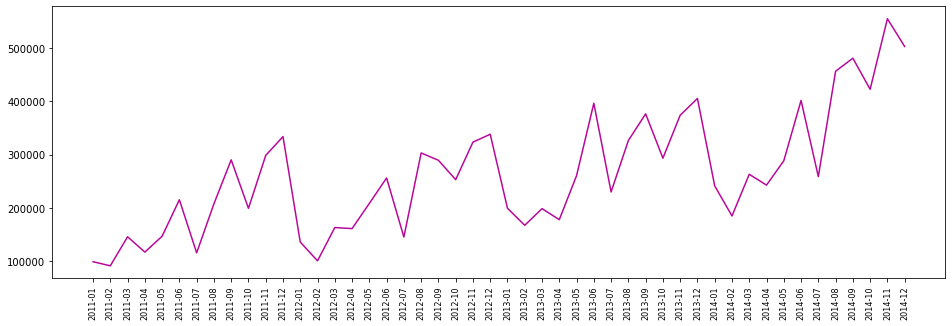

In [20]:
# Setting the figure size
plt.figure(figsize=(16, 5))
plt.plot(df_temp['month_year'], df_temp['sales'], color='#b80799')
plt.xticks(rotation='vertical', size=8)
plt.show()

<h2>Top 10 products by Sales</h2>

In [21]:
# Grouping products by sales
prod_sales = pd.DataFrame(df.groupby('product_name').sum()['sales'])

# Sorting the dataframe in descending order
prod_sales.sort_values(by=['sales'], inplace=True, ascending=False)

# Top 10 products by sales
prod_sales[:10]

,sales
product_name,
"Apple Smart Phone, Full Size",86935.7786
"Cisco Smart Phone, Full Size",76441.5306
"Motorola Smart Phone, Full Size",73156.3030
"Nokia Smart Phone, Full Size",71904.5555
Canon imageCLASS 2200 Advanced Copier,61599.8240
"Hon Executive Leather Armchair, Adjustable",58193.4841
"Office Star Executive Leather Armchair, Adjustable",50661.6840
"Harbour Creations Executive Leather Armchair, Adjustable",50121.5160
"Samsung Smart Phone, Cordless",48653.4600


<h2>Most Selling Products</h2>

In [22]:
# Grouping products by Quantity
best_selling_prods = pd.DataFrame(df.groupby('product_name').sum()['quantity'])

# Sorting the dataframe in descending order
best_selling_prods.sort_values(by=['quantity'], inplace=True, ascending=False)

# Most selling products
best_selling_prods[:10]

,quantity
product_name,
Staples,876
"Cardinal Index Tab, Clear",337
"Eldon File Cart, Single Width",321
"Rogers File Cart, Single Width",262
"Sanford Pencil Sharpener, Water Color",259
"Stockwell Paper Clips, Assorted Sizes",253
"Avery Index Tab, Clear",252
"Ibico Index Tab, Clear",251
"Smead File Cart, Single Width",250


<h2>Most Prefered Ship Mode</h2>

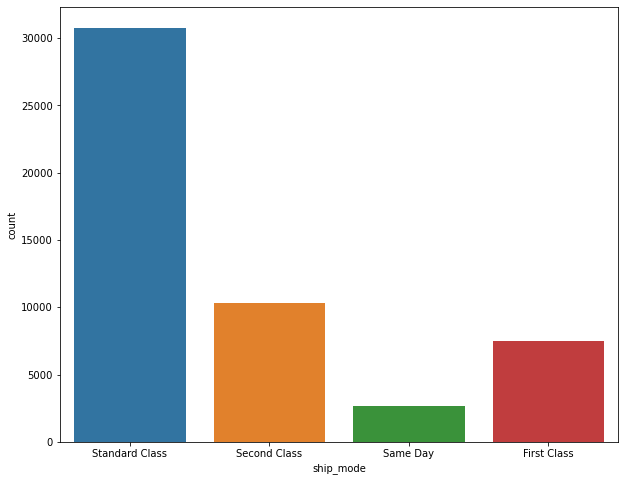

In [23]:
# Setting the figure size
plt.figure(figsize=(10, 8))

# countplot: Show the counts of observations in each categorical bin using bars
sns.countplot(x='ship_mode', data=df)

# Display the figure
plt.show()

<h2>Lead Time</h2>
<p>For the purpose of this case let's understand that lead time is the time it takes between order input and fulfillment, in other words, we are <b>NOT</b> taking into account the transit time, which is the interval needed for a shipment to be delivered once it has been picked up from the point of departure</p>

In [35]:
# Time between order confirmation and shipping time
lead_t = df['ship_date']-df['order_date']
lead_t.head()

0   5 days
1   7 days
2   4 days
3   4 days
4   7 days
dtype: timedelta64[ns]

In [36]:
# Average lead time by days
lead_t.describe()

count                        51290
mean     3 days 23:15:53.589393644
std      1 days 17:30:23.320880732
min                0 days 00:00:00
25%                3 days 00:00:00
50%                4 days 00:00:00
75%                5 days 00:00:00
max                7 days 00:00:00
dtype: object

<h2>Most Profitable Category and sub-category</h2>

In [31]:
# Grouping products by Category and Sub-Category
cat_subcat = pd.DataFrame(df.groupby(['category', 'sub_category']).sum()['profit'])

# Sorting the values
cat_subcat.sort_values(['category','profit'], ascending=False)

profit
category        sub_category              
Technology      Copiers       258567.54818
                Phones        216717.00580
                Accessories   129626.30620
                Machines       58867.87300
Office Supplies Appliances    141680.58940
                Storage       108461.48980
                Binders        72449.84600
                Paper          59207.68270
                Art            57953.91090
                Envelopes      29601.11630
                Supplies       22583.26310
                Labels         15010.51200
                Fasteners      11525.42410
Furniture       Bookcases     161924.41950
                Chairs        141973.79750
                Furnishings    46967.42550
                Tables        -64083.38870

<h2>Sales by Country</h2>
<h3>Best & Worst Performance</h3>

In [51]:
#General Sales by Country, top 10 countries with the higher sales
country_sales = pd.DataFrame(df.groupby('country').sum()['sales'])
co_sales_sorted = country_sales.sort_values(['sales'], ascending= False).round()
co_sales_sorted.head(10)

,sales
country,
United States,2297201.0
Australia,925236.0
France,858931.0
China,700562.0
Germany,628840.0
Mexico,622591.0
India,589650.0
United Kingdom,528576.0
Indonesia,404887.0


In [52]:
#the 10 countries with the lowest sales amount
co_sales_sorted.tail(10)

,sales
country,
Ethiopia,851.0
United Arab Emirates,744.0
Bahrain,669.0
Swaziland,288.0
Burundi,268.0
Tajikistan,243.0
Macedonia,210.0
Eritrea,188.0
Armenia,157.0


<p>Note: there is another version of this project, which is performed by EDSOfficial, which are the owners of the data set.</p>